In [1]:
%load_ext autoreload
%autoreload 2

import os
import json
import pickle
import jsonlines
import pandas as pd
from collections import defaultdict
import shutil
from tqdm import tqdm

def load_pickle_file(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

# 输入json文件路径
JSON_FILE_PATH = 'dataset/rank/nq-rank-10.json'

100%|██████████| 3452/3452 [00:00<00:00, 892427.11it/s]


 0    958
 1    468
 2    334
 3    201
 4    154
 5    133
 6     87
 7     90
 8     90
 9     67
-1    870
dtype: int64


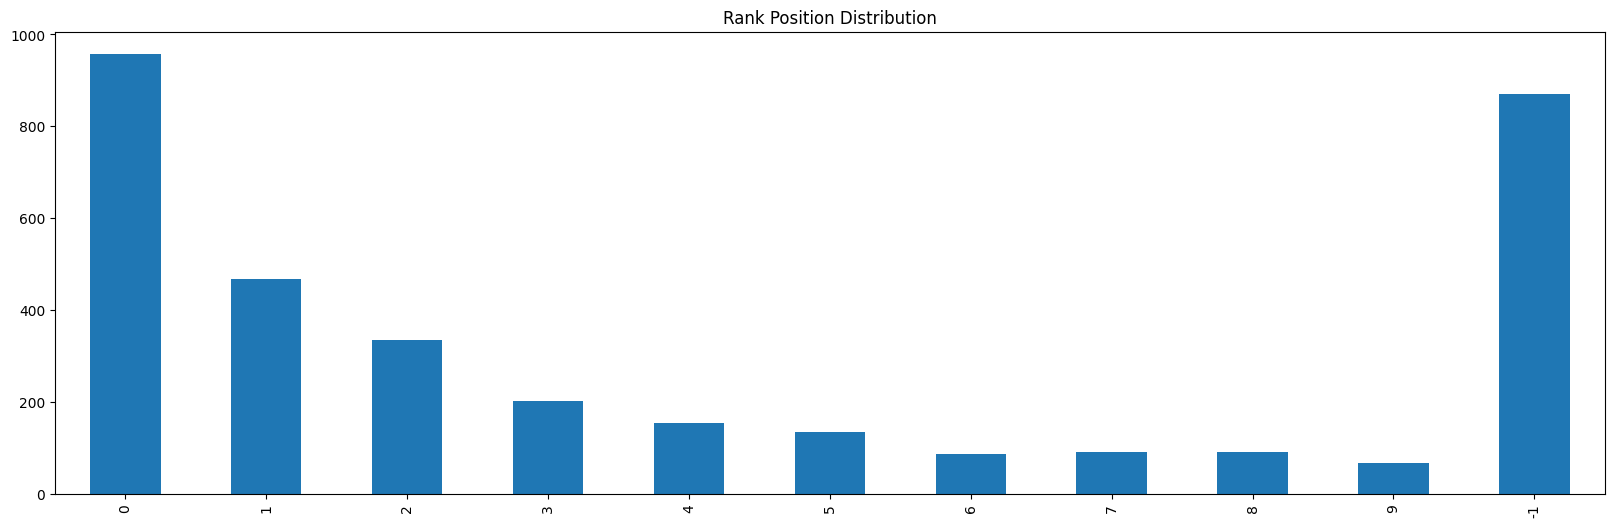

In [2]:
# 加载json文件
with open(JSON_FILE_PATH, 'r') as f:
    all_data = json.load(f)

# 正确答案在rank中的位置统计
rank_pos = defaultdict(int)
for qid in tqdm(all_data['query_ids']):
    query = all_data['queries'][qid]
    doc_ids = all_data['rank'][qid]
    qrels = all_data['qrels'][qid]
    for ans_doc_id in qrels:
        if ans_doc_id in doc_ids:
            rank_pos[doc_ids.index(ans_doc_id)] += 1
            break

# 可视化rank_pos
total = len(all_data['query_ids'])
rank_pos = dict(sorted(rank_pos.items(), key=lambda x: x[0]))
no_ans = total - sum(rank_pos.values())
rank_pos[-1] = no_ans
# rank_pos.add(-1, no_ans)
rank_pos = pd.Series(rank_pos)
# rank_pos /= len(all_data['query_ids'])
rank_pos.plot(kind='bar', figsize=(20, 6), title='Rank Position Distribution')

print(rank_pos)

# print(f'Total: {total}')

# print(len(all_data['query_ids']))
